In [1]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from metrics_toolbox import EvaluatorBuilder
import numpy as np

# 1. Multiclass classification

{'roc_auc_micro_mean': 0.9926128472222222,
 'roc_auc_micro_std': 0.010201167145262246,
 'roc_auc_macro_mean': 0.9909654400272326,
 'roc_auc_0_latest': 1.0,
 'roc_auc_1_latest': 1.0,
 'roc_auc_2_latest': 1.0,
 'accuracy_mean': 0.9479166666666667,
 'precision_1_latest': np.float64(0.8421052631578947),
 'precision_macro_latest': np.float64(0.9473684210526315)}

{'roc_auc_micro_steps': [0.9988888888888889,
  0.999375,
  0.9750000000000001,
  0.9971874999999999],
 'roc_auc_macro_steps': [0.9983207176189633,
  0.9989277946267193,
  0.9666132478632479,
  1.0],
 'roc_auc_0_steps': [1.0, 1.0, 1.0, 1.0],
 'roc_auc_1_steps': [0.9973544973544973,
  0.9985754985754987,
  0.9479166666666666,
  1.0],
 'roc_auc_2_steps': [0.9976076555023924,
  0.9982078853046594,
  0.9519230769230769,
  1.0],
 'accuracy_steps': [0.9666666666666667, 0.975, 0.925, 0.925],
 'precision_1_steps': [np.float64(0.9),
  np.float64(0.9285714285714286),
  np.float64(0.9090909090909091),
  np.float64(0.8421052631578947)],
 'precision_macro_steps': [np.float64(0.9666666666666667),
  np.float64(0.9761904761904763),
  np.float64(0.9252525252525253),
  np.float64(0.9473684210526315)]}

{'roc_auc_curves': <Figure size 1800x960 with 6 Axes>,
 'confusion_matrices': <Figure size 1800x960 with 10 Axes>}

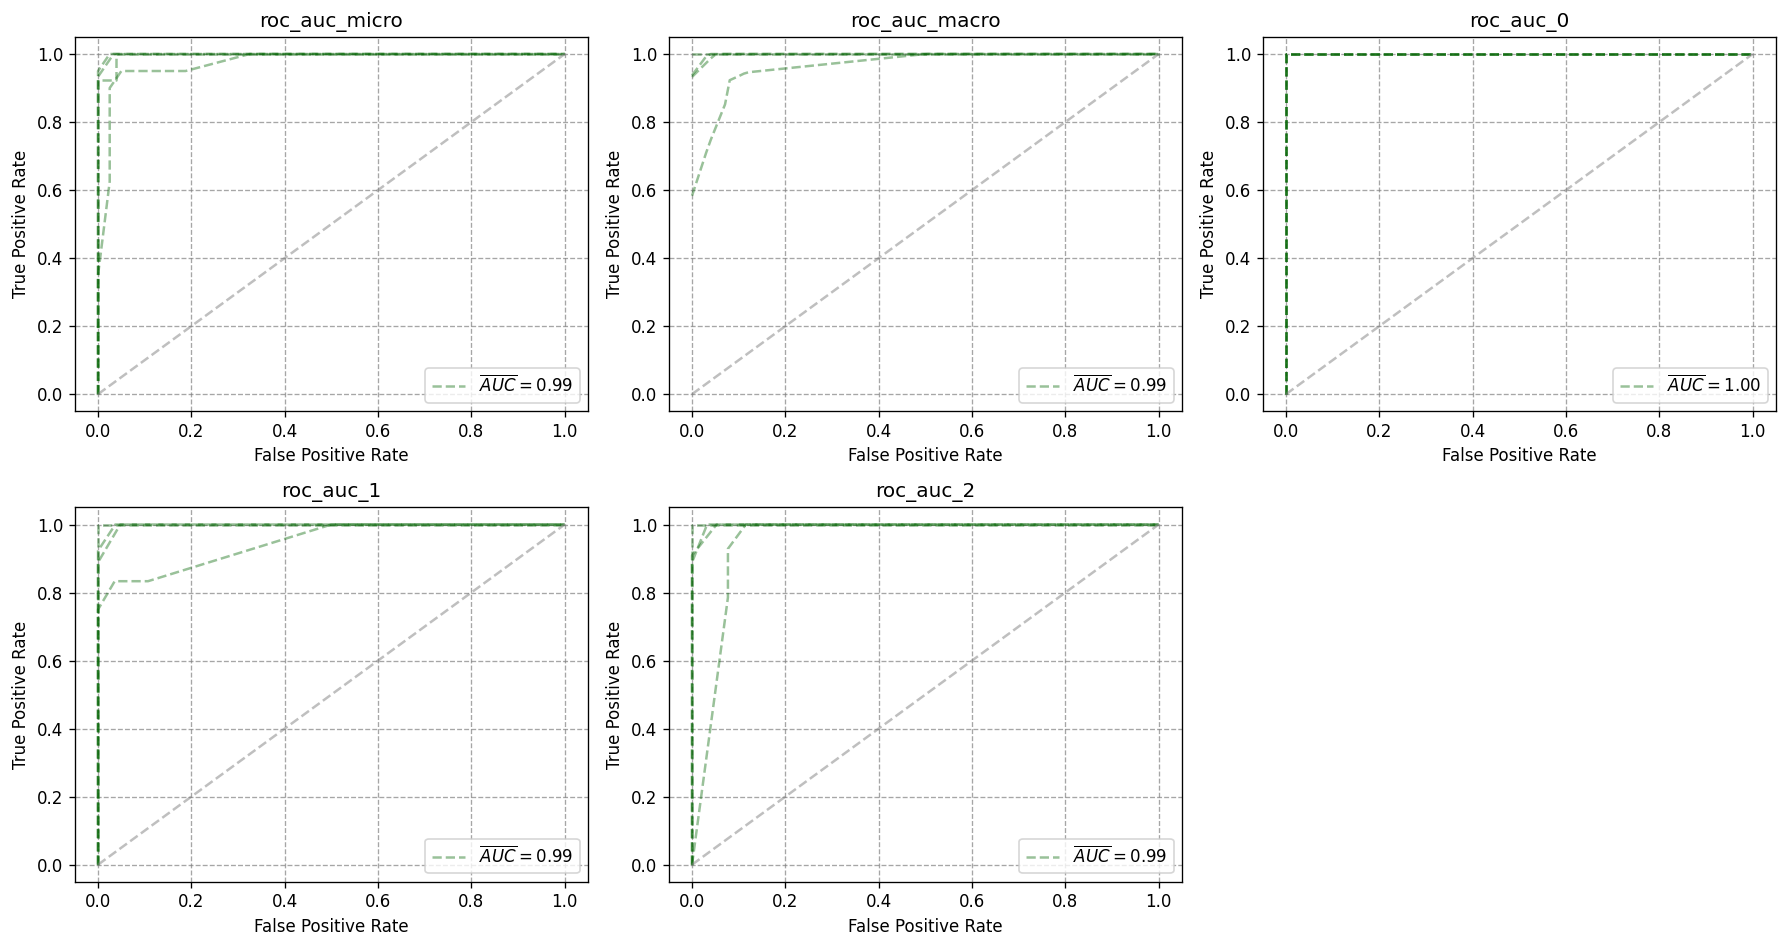

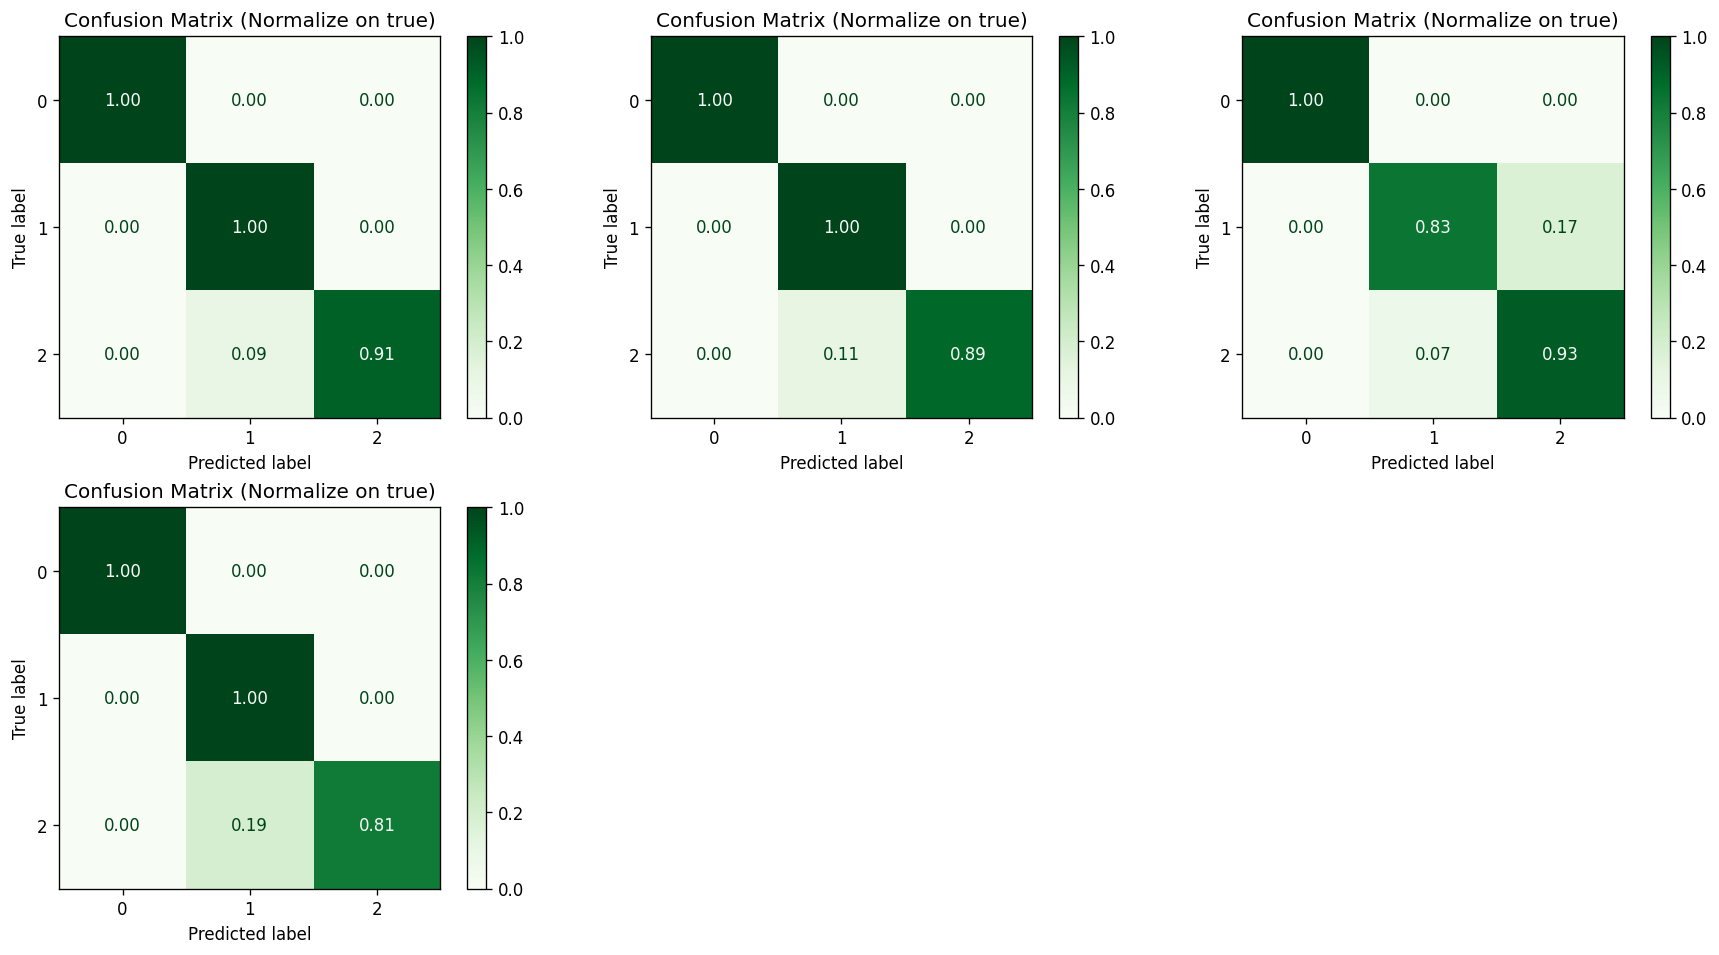

In [2]:
# 1. Load multiclass dataset (3 classes: setosa, versicolor, virginica)
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train a model
model = RandomForestClassifier(n_estimators=2, random_state=42, max_depth=2)
model.fit(X_train, y_train)

# 3. Build evaluator with multiclass metrics
evaluator = (
    EvaluatorBuilder()
    .add_metric("roc_auc_micro", reducers=["mean", "std"])              # Micro-averaged
    .add_metric("roc_auc_macro", reducers=["mean"])                     # Macro-averaged
    .add_metric("roc_auc_target", target_name=0, reducers=["latest"])   # Setosa
    .add_metric("roc_auc_target", target_name=1, reducers=["latest"])   # Versicolor
    .add_metric("roc_auc_target", target_name=2, reducers=["latest"])   # Virginica
    .add_metric("accuracy", reducers=["mean"])                          # Overall accuracy
    .add_metric("precision_target", target_name=1)                      # Precision for Versicolor   
    .add_metric("precision_macro")                                      # Macro-averaged precision
).build()

# 4. Add model evaluations
evaluator.add_model_evaluation(model, X_test, y_test)
N = 3 # Split training data into N sets and evaluate each
train_size = X_train.shape[0]
split_size = train_size // N
for i in range(N):
    start_idx = i * split_size
    end_idx = (i + 1) * split_size if i < N - 1 else train_size
    X_split = X_train[start_idx:end_idx]
    y_split = y_train[start_idx:end_idx]
    evaluator.add_model_evaluation(model, X_split, y_split)

# 5. Get results
result = evaluator.get_results()
display(result["values"])
display(result["steps"])
display(result["figures"])

# 6. View ROC curves for all classes
display(result['figures']['roc_auc_curves'])
display(result['figures']['confusion_matrices'])